# Applying Improved Random Forest Explainability (RFEX 2.0) on synthetic data 

Authors: Sabiha Barlaskar, Dragutin Petkovic

SFSU CS Department

05/12/2019


## 1. Introduction 

This toolkit serves to execute RFEX 2.0 “pipeline” e.g. a set of steps to produce information which comprises RFEX 2.0 summary namely information to enhance explainability of Random Forest classifier. It comes with the synthetically generated test database which helps to demonstrate how RFEX 2.0 works. Wth this toolkit users can also use their own data to generate RFEX 2.0 summary.

Background of the RFEX 2.0 method, as well as the description and access to the synthetic test database convenient to test and demonstrate can be found in TR 18.01 at cs.sfsu.edu site:

· S. Barlaskar and D. Perkovic “Applying Improved Random Forest Explainability (RFEX 2.0) steps on synthetic data for variable features having a unimodal distribution” which can be found in the link below o http://cs.sfsu.edu/sites/default/files/technical-reports/Applying%20RF%20Explainability%20on%20%20%20%20%20%20%20synthetic_data-variable_values_for_features-11_27Sabiha%20%20FINAL%2002-18-19%281%29.pdf

Users are strongly advised to read the above report before using this toolkit.

Users of this toolkit are supposed to be familiar with Random Forest method and R toolkit, as well as Jupyther toolkit .

RFEX 2.0 toolkit is run in a set of RFEX 2.0 steps, as described below. Its output is a set of tabular-formatted data called RFEX 2.0 summary providing the information to help understand how RF performed its classification on given training data. RFEX 2.0 attempts to help explain how RF makes its decision on a set of data e.g. training data, thus it is a model based explainer.

In this tool we consider binary classification only, meaning there are only two classes, + (class of interest) and -.

## 2. License 

This toolkit is provided for free use and modification. Those who publish the paper are required to cite this toolkit and the publication below

- D. Petkovic, R. Altman, M. Wong, A. Vigil: “Improving the explainability of Random Forest classifier – user centered approach”, Pacific Symposium on Biocomputing PSB 2018, Hawaii

## 3.Test data used in this toolkit 



Below we describe the synthetic test database manually carefully created to enable us to easily explain and test RFEX 2.0. It is the same database used in TR 18.01 described above. Users can replace this database with their own following data formats and steps described below.

The data set in synthetic test database consists of 1000 samples or feature vectors, each with 10 features Fi (i=1..10)), and class assignment (1 for positive class, 0 for negative). In order to use this data for testing RFEX we created it in such a way that it has some easy to assess and obvious ground truth, that is, only F1 and F2 have predictive power and can together perfectly classify the data, while F3-F10 have no predictive power. Class balance (ratio of number of positive vs. negative class samples) is set to be about 50-50%. Specifically:

- We created two features (F1, F2) which together offer perfect classification/prediction,

- We created other features (F3-F10) with data which are irrelevant for prediction. The reason behind this is to observe if the RFEX pipeline will be able to identify the most important features as well features that are useless.
More details can be found in this report: http://cs.sfsu.edu/sites/default/files/technical-reports/Applying%20RF%20Explainability%20on%20%20%20%20%20%20%20synthetic_data-variable_values_for_features-11_27Sabiha%20%20FINAL%2002-18-19%281%29.pdf

The data itself can be downloaded using this link: https://drive.google.com/file/d/1KKZ6iK_0aBAesGZgwYnORHLPtGtfNXLM/view

## 4.RFEX 2.0 steps

The steps of RFEX 2.0 are as follows, and each is clearly marked and executed below, one by one (after the data has been accessed).

1. Apply Random Forest (RF) to establish base RF accuracy using all features of the data set for classification.

2. Identify the most important features using Mean Decrease in Accuracy (MDA) (or MDA specific to + class, e.g. MDA+, in case of imbalanced data) and rank the features according to the predictive power indicated by MDA.

3. Provide tradeoff between accuracy and the number of top ranked features used.

4. Apply Man Whitney White (MWW) to each feature to test if the features values for + and – class are independent of each other

5. Provide basic feature range information (AV/SD for each feature values, separately for + and – class)

6. Identify the most important combination of features e.g. cliques of 2 features with highest predictive powers

7. Produce a one-page RFEX summary showing above information in easy to understand table formatted way

## 5.Installation

To install Jupyter Notebook, Python installation is a prerequisite. But it is feasible to install Jupyter via Anaconda because it installs Python, Jupyter notebook together, as well as it is easier to install libraries instead of using 'pip install'.
For installation direction, please follow the instructions in this link: https://jupyter.readthedocs.io/en/latest/install.html

For loading R and Python together, please execute the following line of code

In [4]:
#loading R and python together.
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## 6.Data Input


In this step we need to access the trnaing data for which we seek to perform RF classification and explore RF explainability. The required format of the data that is entered should be in csv format. For example the name of the file should be "sample_file.csv". CSV is comma separated values.

Below we show how to access the test database used in TR 18.01 report and we also explain how user can access their own data provided they adhere to certain format described here. The format of the data should match the format provided in this link, https://drive.google.com/file/d/1KKZ6iK_0aBAesGZgwYnORHLPtGtfNXLM/view
The target column should be the last column and the features should preced the target columns

### Code for data input

Below is the code for reading the data as input via a textbox. The widgets are created using Python. IPython widgets gives the liberty to create a user interface in Jupyter notebook. For more information, please refer to this link: https://ipywidgets.readthedocs.io/en/stable/

In [2]:
#Code to take data as input in a textbox
from IPython.display import display
import ipywidgets as widgets
import os
import base64 
from os import listdir
import rpy2.rinterface
import ipywidgets as widgets 
from traitlets import Unicode 
from rpy2.robjects import default_converter
from rpy2.robjects import pandas2ri
import pandas as pd
#Code to make the directory default directory where the data resides. You can change it to your own custom directory.
# USe the entire pathname for uploading data
import os
os.chdir('/Users/sabihabarlaskar/Desktop/Project RF/Predicting_student_grades')
data = None
mtry = None
ntree = None
c1 = None
cutoff = None
cutoff_slider = None
#button = widgets.Button(description="Upload")

def handle_submit(sender):
    global data
    df = pd.read_csv(text.value)
    data = df
    if len(data)>0:
        print("Uploaded Data!")
    else:
        print("Upload Failure!")
    return data

def handle_ntree(sender):
    global ntree
    ntree = sender.value
    if len(ntree)>0:
        print("Successfully inserted ntree values")
    else:
        print("No values provided!")
        
    return ntree

def handle_cutoff(sender):
    global cutoff
    cutoff = sender.value
    if len(cutoff)>0:
        print("Successfully inserted cutoff values")
    else:
        print("No values provided!")
    return cutoff

def handle_mtry(sender):
    global mtry
    mtry = sender.value
    if len(mtry)>0:
        print("Successfully inserted mtry values")
    else:
        print("No values provided!")
    return mtry


### Uploading the dataset 

In [3]:
#Entering the data file name into the text box.
print(" Enter the filename in the textbox in the format of a csv file (Example: sample_data.csv).\n The data should be in the format, where the target column should be the last column. You can use our synthetic dataset to be familiar with the type of the data to use, please check this dataset for reference:\n https://drive.google.com/file/d/1KKZ6iK_0aBAesGZgwYnORHLPtGtfNXLM/view:")
text = widgets.Text()
display(text)
text.on_submit(handle_submit)
#example of file name

 Enter the filename in the textbox in the format of a csv file (Example: sample_data.csv).
 The data should be in the format, where the target column should be the last column. You can use our synthetic dataset to be familiar with the type of the data to use, please check this dataset for reference:
 https://drive.google.com/file/d/1KKZ6iK_0aBAesGZgwYnORHLPtGtfNXLM/view:


Text(value='')

Uploaded Data!


## 7.Applying RFEX 2.0

Below we show all 6 steps in RFEX 2.0 “pipeline” and apply one after another

### RFEX 2.0 Step 1: Apply Random Forest (RF) to establish base RF accuracy using all features of the data set for classification.

The first step is to apply Random Forest algorithm [2] to find out the best accuracy using f1-score as our main evaluation measure, and also report recall, precision and OOB error. This is achieved by grid search over user chosen Ntree, Mtry and Cutoff parameters [2]. These parameters are briefly described below.

- Ntree: Number of trees to grow. This should not be set to too small a number (e.g. 500 or 1000, to ensure that every input row gets predicted at least a few times.

- Mtry: Number of variables randomly sampled as candidates at each split. Recommended values are the following 0.5*SQRT(Ntree); SQRT(Ntree); 2*SQRT(Ntree)

- Cutoff: Changing the cutoff changes, the voting ratio in the ensemble of Ntrees, which then changes the “sensitivity” e.g. recall and precision or f1 score. We recommend (0.1; 0.2; 0,3;…..0.9)

- f1-score: The f1-score is used to evaluate a classification algorithm’s performance. It is the harmonic mean of precision (the number of true positives divided by the sum of true and false positives) and recall (the number of true positives divided by the number of true positives and false negatives) for calculating the score. The formula for calculating f1-score is:

f1 = 2*((recall*precision)/(precision+recall))

We will then perform grid search varying user chosen mtry, ntree and the cutoff in order to record the best f1 scores.


## Grid search to select best parameters to train the data resulting in best f1 scores

We will perform grid search varying the user entered mtry, ntree and the cutoff in order to record the best f1 scores.

### Selecting best optimal mtry for grid search

Enter mtry in the textbox separated by commas. 
The mtry should be in the range
- [1-sqrt(number of features)] or,
- [1-2*sqrt(number of features)]or,
- [1-1/2*sqrt(number of features)]

In [5]:
print("Enter mtry in the textbox in the range provided above separated by commas:")
mtry = widgets.Text()
display(mtry)
mtry.on_submit(handle_mtry)

Enter mtry in the textbox in the range provided above separated by commas:


Text(value='')

Successfully inserted mtry values


### Selecting best optimal ntree for grid search

In [6]:
print("Enter ntree in the textbox in the range [1-1000] separated by commas:")
ntree = widgets.Text()
display(ntree)
ntree.on_submit(handle_ntree)

Enter ntree in the textbox in the range [1-1000] separated by commas:


Text(value='')

Successfully inserted ntree values


### Selecting optimal cutoff for the grid search

In [7]:
print("Enter only one of the cutoff pair in the textbox in the range [0.1-0.9] separated by commas:")
cutoff = widgets.Text()
display(cutoff)
cutoff.on_submit(handle_cutoff)

Enter only one of the cutoff pair in the textbox in the range [0.1-0.9] separated by commas:


Text(value='')

Successfully inserted cutoff values


Using the mtry, ntree, cutoff values provided in the box above, we perform grid search to find the combination which produces RF classification with best f1-score

## Using grid search for training the Random Forest classifier with the above entered parameters (mtry, cutoff, ntree)

In [8]:
%%R -i cutoff -i mtry -i ntree -i data -o max_f1 -o max_cut -o max_mtry -o max_ntree -o max_precision -o max_recall
library(randomForest)
data$target = factor(data$target)
cutoff_list = unlist(strsplit(cutoff,","))
mtry_list = unlist(strsplit(mtry,","))
ntree_list = unlist(strsplit(ntree,","))
set.seed(830)
max_f1 = 0
max_cut = 0
max_mtry = 0
max_ntree = 0
max_precision = 0
max_recall = 0
# a nested for loop for ntree, mtry, cutoff?
for (cut in cutoff_list )
{
    for (Mtry in mtry_list)
    {
        for (Ntree in ntree_list)
        {
            cut = as.numeric(cut)
            Mtry = as.numeric(Mtry)
            Ntree = as.numeric(Ntree)
            fit_data <- randomForest(data$target ~ ., data=data, importance=TRUE, proximity=TRUE, cutoff=c(cut, 1-cut), ntree=Ntree, mtry=Mtry)
            true_positives = fit_data$confusion['1','1']
            true_negatives = fit_data$confusion['0','0']
            false_positives = fit_data$confusion['0','1']
            false_negatives = fit_data$confusion['1','0']
            accuracy = (true_positives + true_negatives)/nrow(data)
            precision = true_positives/(true_positives+false_positives)
            recall = true_positives/(true_positives + false_negatives)
            f1_score = 2*((recall*precision)/(precision+recall))
            if (! is.nan(f1_score) && f1_score > max_f1)
            {
                max_f1 = f1_score
                max_cut = cut
                max_mtry = Mtry
                max_ntree = Ntree
                max_precision = precision
                max_recall = recall
            }
        }
    }
}



In [9]:
%%R -i max_ntree -i max_mtry -i max_cut -i max_f1 -i max_precision -i max_recall
cat("Optimal ntree is:", max_ntree)
cat("\nOptimal mtry is:", max_mtry)
cat("\nOptimal cutoff pair is:", max_cut,",", (1-max_cut))
cat("\nBest f1-score is:", max_f1)
cat("\nBest precision is:", max_precision)
cat("\nBest recall is:", max_recall)

             

Optimal ntree is: 500
Optimal mtry is: 4
Optimal cutoff pair is: 0.2 , 0.8
Best f1-score is: 0.9820789
Best precision is: 1
Best recall is: 0.9647887

## RFEX 2.0 Step 2: Identify the most important features using Mean Decrease in Accuracy (MDA) (or MDA specific to + class, e.g. MDA+, in case of imbalanced data) and rank the features according to the predictive power indicated by MDA.

In this step we perform MDA feature ranking which will then be used to reduce the number of features for further analysis – critical step in RFEX. In case of balanced training data (number of samples for + and – class is appr. equal) we recommend simple MDA, in case of unbalanced trnaing data we recommend using MDA + e.g. class specific MDA focused on class of interest, namely + class.

### Choose the number of important features you want to see  

In [10]:
num = None
imp_arr = [x for x in range(1,len(data.columns))]
drpdwn = widgets.Dropdown(
        options = imp_arr,
        value=5,
        description='Number of features:',
        disabled=False,
    )
display(drpdwn)
def on_change(change):
    global num
    if change['type'] == 'change' and change['name'] == 'value':
        print (change['new'])
        num = change['new']
        return num
drpdwn.observe(on_change)

Dropdown(description='Number of features:', index=4, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=5)

10


In [11]:
%%R -i num -o important_features -o colnames -o important
important = importance(fit_data,type=1)[,1]
important_features = sort(importance(fit_data,type=1)[,1],decreasing = TRUE)
colnames = names(important_features[1:num])


In [12]:
from IPython.core.display import HTML
for i,j in zip(colnames,important_features[1:num+2]):
    display(HTML("<br>%s<br>%s"%(i,j)))
    

## RFEX 2.0 step 3: Provide tradeoff between accuracy and the number of top ranked features used.



The goal of this crucial step is to reduce complexity (using feature reduction) and to provide a tradeoff where the user can observe the f1-score of the subsets of K top ranked features and thus can choose less features for a given loss of accuracy (e.g. drop in f1 value from the base accuracy when all features are used). This step is performed as follows:

Let TopN be the number of features ranked highly by MDA in Step 2 (TopN = 10 in our case)

For K = 2 to K=TopN

Train RF using only K top ranked features (vary ntree, mtry

and cutoff to get max f1-score)

Record maximal f1-score(K) for set of K top ranked features

The user can then chose how many TopK features to use to achieve desired accuracy. In our experience this number is way below total number of features (on the order of 5-7 % for accuracy over 90% of the accuracy when all features are used). TopK is usually on the order of 10.

Note: after choosing TopK features here, further RFEX 2.0 steps deal only with those TopK features.


### Choose the k features for which you want to view the tradeoff, eg. What is the best f1-score using top ranked k features

In [13]:
k = None
k_arr = [x for x in range(1,len(data.columns))]
k_drpdwn = widgets.Dropdown(
        options = k_arr,
        value=5,
        description='Top features:',
        disabled=False,
    )

def on_change(change):
    global k
    if change['type'] == 'change' and change['name'] == 'value':
        print (change['new'])
        k = change['new']
        return k


In [14]:
display(k_drpdwn)
k_drpdwn.observe(on_change)


Dropdown(description='Top features:', index=4, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=5)

10


In [15]:
%%R -i colnames -i k -o k -i cutoff -i mtry -i ntree
features = names(data[1:10])
f1_scores = c()
c = 0
for (j in 1:k+1){
    set.seed(100)
    rf_k <- randomForest(data[,features[1:j]],data$target,ntree=1000,cutoff=c(0.5,0.5),mtry = sqrt(j))
    print(rf_k)
    true_positives = rf_k$confusion['1','1']
    true_negatives = rf_k$confusion['0','0']
    false_positives = rf_k$confusion['0','1']
    false_negatives = rf_k$confusion['1','0']
    cat("\n****************************************************\n")
    #Accuracy
    
    accuracy = (true_positives + true_negatives)/nrow(data)
    #cat("Accuracy:",accuracy)
    #cat("\n****************************************************\n")
    #Precision
    precision = true_positives/(true_positives+false_positives)
    #cat("Precision:",precision)
    #cat("\n***************************************************\n")
    #Recall
    recall = true_positives/(true_positives + false_negatives)
    #cat("Recall:",recall)
    #cat("\n***************************************************\n")
    #F1-score
    f1score = 2*((recall*precision)/(precision+recall))
    cat("F1-score:",f1score)
    f1_scores[j] = f1score
    cat("\n***************************************************\n")
    c = c+1
    print(c)
    if(j>=k+1)
        {
        break
    }
  }



Call:
 randomForest(x = data[, features[1:j]], y = data$target, ntree = 1000,      mtry = sqrt(j), cutoff = c(0.5, 0.5)) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 1.5%
Confusion matrix:
    0   1 class.error
0 574   0  0.00000000
1  15 411  0.03521127

****************************************************
F1-score: 0.9820789
***************************************************
[1] 1

Call:
 randomForest(x = data[, features[1:j]], y = data$target, ntree = 1000,      mtry = sqrt(j), cutoff = c(0.5, 0.5)) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 1.5%
Confusion matrix:
    0   1 class.error
0 574   0  0.00000000
1  15 411  0.03521127

****************************************************
F1-score: 0.9820789
**********************

In [16]:
%%R -o f1_scores_summ
features = names(data[1:10])
f1_scores_summ = c()
c = 0
for (j in 1:10){
    set.seed(100)
    rf_k <- randomForest(data[,features],data$target,ntree=1000,cutoff=c(0.5,0.5),mtry = sqrt(j))
    #print(rf_k)
    true_positives = rf_k$confusion['1','1']
    true_negatives = rf_k$confusion['0','0']
    false_positives = rf_k$confusion['0','1']
    false_negatives = rf_k$confusion['1','0']
    #cat("\n****************************************************\n")
    #Accuracy
    
    accuracy = (true_positives + true_negatives)/nrow(data)
    #cat("Accuracy:",accuracy)
    #cat("\n****************************************************\n")
    #Precision
    precision = true_positives/(true_positives+false_positives)
    #cat("Precision:",precision)
    #cat("\n***************************************************\n")
    #Recall
    recall = true_positives/(true_positives + false_negatives)
    #cat("Recall:",recall)
    #cat("\n***************************************************\n")
    #F1-score
    f1score = 2*((recall*precision)/(precision+recall))
    f1_scores_summ[j] = f1score
    #cat("\n***************************************************\n")
    c = c+1
    #print(c)
    
  }
f1_scores_summ

 [1] 0.9820789 0.9820789 0.9820789 0.9820789 0.9820789 0.9820789 0.9820789
 [8] 0.9820789 0.9820789 0.9820789


The figure below shows the tradeoff between number of features and f1-score

[1]  2  3  4  5  6  7  8  9 10


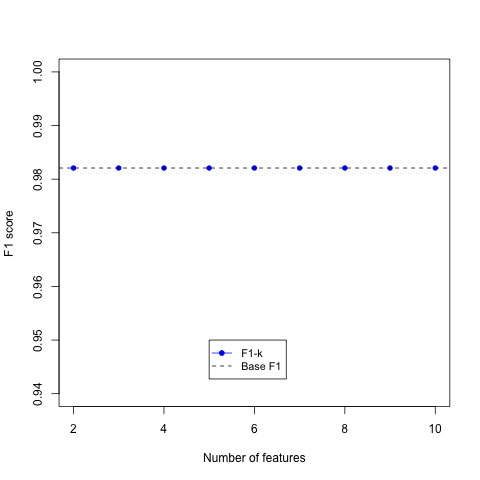

In [17]:
%%R -i k
x = 2:k
y = f1_scores[2:k]
print(x)
plot(x,y,pch=16,col="blue",xlab="Number of features",ylab="F1 score",ylim= c(0.94,1))
abline(a=max(y),b=0,lty=2)
legend(5,0.95,legend=c("F1-k","Base F1"),col=c("blue","black"),pch=c(19,NA),lty=1:2,cex=0.9)
#add some text for the table from the paper

### Note: after choosing TopK features here, further RFEX 2.0 steps deal only with those TopK features.

## RFEX 2.0 Step 4: Apply Man Whitney White (MWW) to each feature to test if the features values for + and – class are independent of each other

We use Man-Whitney-Wilcox test to determine if for each feature, feature values for + class come form independent distribution wrt. feature values of – class. Man-Whitney-Wilcox test is a test of a hypothesis of the distribution of data [see for example https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test]. MWW is a non-parametric test of assuming a null hypothesis of class specific samples not being independent from each other. It doesn’t assume a normal distribution and can also be used to assess if two independent samples were selected from populations having the same distribution. We applied MWW test for each feature to determine if feature values from one class are independent from feature values of another class. We use p<0.05 and say YRES of feature values are independent, and NO otherwise.


In [18]:
%%R -o p_values
p_values = c()
pos_class = data[data$target == '1',]
neg_class = data[data$target == '0',]
features = c('F1','F2','F3','F4','F5','F6','F7','F8','F9','F10')
j = 1
for (i in names(data[,-11])){
  w = wilcox.test(pos_class[,i],neg_class[,i])
  cat("Features:",j,i,",","p-value:",w$p.value,"\n")
  j = j+1
  p_values[i] = w$p.value
}


Features: 1 F1 , p-value: 6.655816e-84 
Features: 2 F2 , p-value: 1.303722e-31 
Features: 3 F3 , p-value: 0.7208988 
Features: 4 F4 , p-value: 0.9052657 
Features: 5 F5 , p-value: 0.3677917 
Features: 6 F6 , p-value: 0.2554999 
Features: 7 F7 , p-value: 0.477444 
Features: 8 F8 , p-value: 0.8033728 
Features: 9 F9 , p-value: 0.09848955 
Features: 10 F10 , p-value: 0.2906391 


## RFEX 2.0 Step 5: Provide basic feature range information (AV/SD of feature values, separately for + and – class, for each feature)

To get some idea about the range of feature values for + and – class for each feature, we provide basic feature range information namely AV/SD for each feature values, separately for + and – class

In [19]:

pos_class = data[data['target'] == 1]
neg_class = data[data['target'] == 0]
display(HTML("<table><tr><td>Features</td><td>Mean of pos/SD of pos</td><td>Mean of neg/SD of neg</td></tr></table>"))
for i in data.columns[0:10]:
    #print(round(pos_class[i].mean(),2))
    display(HTML("<table><tr><td>%s</td><td>%s/%s</td><td>%s/%s</td></tr>" % (i,round(pos_class[i].mean(),2),round(pos_class[i].std(),2),round(neg_class[i].mean(),2),round(neg_class[i].std(),2))))
    

    

Features,Mean of pos/SD of pos,Mean of neg/SD of neg


F1,3.48/1.91,7.16/2.58


F2,7.84/4.34,12.27/6.13


F3,7.62/2.07,7.63/2.04


F4,10.29/5.09,10.38/4.9


F5,7.68/1.99,7.78/2.03


F6,4.49/1.04,4.43/1.05


F7,6.12/1.84,6.04/2.03


F8,8.37/3.0,8.46/2.87


F9,5.3/1.96,5.08/1.97


F10,5.97/1.81,5.83/1.93


## RFEX 2.0 step 6: Identify the most important combination of features e.g. cliques of 2 features with highest predictive powers

In order to get some idea which combinations of features are most powerful we considered a clique of 2 features which is a set of all combinations of 2 features. In our case we could try all combinations e.g. for a total of 45 feature combinations for our set of 10 features (e.g. 10 choose 2). We retrained RF Classifier for each of these combinations in order to find the pair of features (clique of 2) with the highest f1-score. Results are presented in the table below. 



In [20]:
clique = None
clq_drpdwn = widgets.Dropdown(
        options = [2,3],
        value=3,
        description='Cliques:',
        disabled=False,
    )

display(clq_drpdwn)
def on_change(change):
    global clique
    if change['type'] == 'change' and change['name'] == 'value':
        print (change['new'])
        clique = change['new']
        return clique
clq_drpdwn.observe(on_change)


Dropdown(description='Cliques:', index=1, options=(2, 3), value=3)

2


## Grid search for each clique of 2

### Selecting cutoff 

In [21]:
print("Enter the cutoff in the textbox separated by commas:")
cutoff = widgets.Text()
display(cutoff)
cutoff.on_submit(handle_cutoff)

Enter the cutoff in the textbox separated by commas:


Text(value='')

Successfully inserted cutoff values


### Selecting optimal mtry

In [22]:
print("Enter the mtry in the range [1-2] in the textbox separated by commas, if clique chosen is 2:\nEnter the mtry in the range [1-3] in the textbox separated by commas, if clique chosen is 3:")
optimal_mtry = widgets.Text()
display(optimal_mtry)
optimal_mtry.on_submit(handle_mtry)

Enter the mtry in the range [1-2] in the textbox separated by commas, if clique chosen is 2:
Enter the mtry in the range [1-3] in the textbox separated by commas, if clique chosen is 3:


Text(value='')

Successfully inserted mtry values


### Selecting optimal ntree

In [23]:
print("Enter the ntree in the range [100-500] in the textbox separated by commas:")
optimal_ntree = widgets.Text()
display(optimal_ntree)
optimal_ntree.on_submit(handle_ntree)

Enter the ntree in the range [100-500] in the textbox separated by commas:


Text(value='')

Successfully inserted ntree values


In [24]:
%%R -i clique -o count -o indices_10

clique = as.numeric(clique)
library(randomForest)
indices_10 = c('F1','F2','F3','F4','F5','F6','F7','F8','F9','F10')
count = 0
if(clique == 2){
    for (i in 1:10){

      for (j in 1:i){
          if(i!=j){
            feature_cliques= c(data[indices_10[i]],data[indices_10[j]] )
            cat(indices_10[i],indices_10[j])
            feature_cliques_df = data.frame(feature_cliques)
            #print(names(feature_cliques_process_df))
            rf_clique2 <- randomForest(feature_cliques_df,data$target,ntree=500,mtry=1,cutoff=c(0.6,0.4),na.action=na.roughfix)

            true_positives = rf_clique2$confusion['1','1']
            true_negatives = rf_clique2$confusion['0','0']
            false_positives = rf_clique2$confusion['0','1']
            false_negatives = rf_clique2$confusion['1','0']
            cat("\n****************************************************\n")
            #Accuracy

            accuracy = (true_positives + true_negatives)/nrow(data)
            #cat("Accuracy:",accuracy)
            #cat("\n****************************************************\n")
            #Precision
            precision = true_positives/(true_positives+false_positives)
            #cat("Precision:",precision)
            #cat("\n***************************************************\n")
            #Recall
            recall = true_positives/(true_positives + false_negatives)
            #cat("Recall:",recall)
            #cat("\n***************************************************\n")
            #F1-score
            f1_score = 2*((recall*precision)/(precision+recall))
            cat("F1-score:",f1_score)
            cat("\n***************************************************\n")
            count = count + 1
            #write.table(paste(c(names(feature_cliques_df),f1_score),collapse="|"),file="synthetic_cliques_2.csv",append=T,row.names=FALSE);
      }
        }
    }
}
if(clique == 3)
    {
    for (i in 1:10){

      for (j in 1:i){
          for (k in 1:j)
              {
              if(i!=j&&i!=k&&j!=k){
            feature_cliques= c(data[indices_10[i]],data[indices_10[j]],data[indices_10[k]] )
            cat(indices_10[i],indices_10[j],indices_10[k])
            feature_cliques_df = data.frame(feature_cliques)
            #print(names(feature_cliques_process_df))
            rf_clique3 <- randomForest(feature_cliques_df,data$target,ntree=500,mtry=2,cutoff=c(0.6,0.4),na.action=na.roughfix)

            true_positives = rf_clique3$confusion['1','1']
            true_negatives = rf_clique3$confusion['0','0']
            false_positives = rf_clique3$confusion['0','1']
            false_negatives = rf_clique3$confusion['1','0']
            cat("\n****************************************************\n")
            #Accuracy

            accuracy = (true_positives + true_negatives)/nrow(data)
            #cat("Accuracy:",accuracy)
            #cat("\n****************************************************\n")
            #Precision
            precision = true_positives/(true_positives+false_positives)
            #cat("Precision:",precision)
            #cat("\n***************************************************\n")
            #Recall
            recall = true_positives/(true_positives + false_negatives)
            #cat("Recall:",recall)
            #cat("\n***************************************************\n")
            #F1-score
            f1_score = 2*((recall*precision)/(precision+recall))
            cat("F1-score:",f1_score)
            cat("\n***************************************************\n")
            count = count + 1
            #write.table(paste(c(names(feature_cliques_df),f1_score),collapse="|"),file="synthetic_cliques_2.csv",append=T,row.names=FALSE);
      }
        }
    }
}
}

#LEt user enter the top ranked clique for printing



F2 F1
****************************************************
F1-score: 0.9820789
***************************************************
F3 F1
****************************************************
F1-score: 0.8247012
***************************************************
F3 F2
****************************************************
F1-score: 0.6621094
***************************************************
F4 F1
****************************************************
F1-score: 0.8266932
***************************************************
F4 F2
****************************************************
F1-score: 0.6956522
***************************************************
F4 F3
****************************************************
F1-score: 0.4937759
***************************************************
F5 F1
****************************************************
F1-score: 0.8255234
***************************************************
F5 F2
****************************************************
F1-score: 0.6893866
****

In [25]:
%%R -o mylist
mylist <- list()

for (i in 1:10){
    max_f1_score = 0
    max_feature2 = 0
      for (j in 1:10){
          if(i!=j)
          {
            feature_cliques= c(data[indices_10[i]],data[indices_10[j]] )
            #cat(indices_10[i],indices_10[j])
            feature_cliques_df = data.frame(feature_cliques)
            #print(names(feature_cliques_process_df))
            rf_clique2 <- randomForest(feature_cliques_df,data$target,ntree=500,mtry=1,cutoff=c(0.6,0.4),na.action=na.roughfix)

            true_positives = rf_clique2$confusion['1','1']
            true_negatives = rf_clique2$confusion['0','0']
            false_positives = rf_clique2$confusion['0','1']
            false_negatives = rf_clique2$confusion['1','0']
            #Accuracy

            accuracy = (true_positives + true_negatives)/nrow(data)
            #cat("Accuracy:",accuracy)
            #cat("\n****************************************************\n")
            #Precision
            precision = true_positives/(true_positives+false_positives)
            #cat("Precision:",precision)
            #cat("\n***************************************************\n")
            #Recall
            recall = true_positives/(true_positives + false_negatives)
            #cat("Recall:",recall)
            #cat("\n***************************************************\n")
            #F1-score
            f1_score = 2*((recall*precision)/(precision+recall))
            #cat("F1-score:",f1_score)
            count = count + 1
            if (! is.nan(f1_score) && f1_score > max_f1_score)
            {
                max_f1_score = f1_score
                max_feature2 = j
                
            }
            
          }
        }
       key <- indices_10[i]
       value <- indices_10[max_feature2]
       cat("Best clique of 2 for ", indices_10[i] ,"is ", indices_10[max_feature2],max_f1_score,"\n")
       mylist[[ key ]] <- value
        
    }


Best clique of 2 for  F1 is  F2 0.9820789 
Best clique of 2 for  F2 is  F1 0.9820789 
Best clique of 2 for  F3 is  F1 0.8247012 
Best clique of 2 for  F4 is  F1 0.8243513 
Best clique of 2 for  F5 is  F1 0.8255234 
Best clique of 2 for  F6 is  F1 0.8247012 
Best clique of 2 for  F7 is  F1 0.822 
Best clique of 2 for  F8 is  F1 0.8255234 
Best clique of 2 for  F9 is  F1 0.8262165 
Best clique of 2 for  F10 is  F1 0.8268268 


## Step 7: Produce a One-page easy to read and understand RFEX Summary of the data



RFEX 20 steps 1-6 produced number of data items which help explain how RF performed its classification. In this toolkit we provide this data in a raw format but for ease of use we also recommend showing the in a tabular format called RFEX 2.0 Summary Table. Columns of RFEX 2.0 Summary Table are suggested below, with rows corresponding to RFEX information for a specific feature. Row (features) are sorted by MDA feature value. Example of such summary can be found in TR 198.01 report.


In [29]:
%%R -i f1_scores_summ -i mylist -o features -o p_value_out
p_value_out = c()

output <- matrix(ncol=7, nrow=10)
features = c('F1','F2','F3','F4','F5','F6','F7','F8','F9','F10')
pos_class = data[data$target == '1',]
neg_class = data[data$target == '0',]


cat('# RFEX toolkit output', '\n',  file = 'RFEX_summary_table.csv')
cat("# Date",Sys.time(),'\n',file = 'RFEX_summary_table.csv',append=TRUE)
cat("# Data Source",'\n',file = 'RFEX_summary_table.csv',append=TRUE)
cat("# Number of important features chosen by the user",'\n',file = 'RFEX_summary_table.csv',append=TRUE)
cat("# Below the follows the description of each column. Rows (Features) are sorted by MDA values",'\n',file = 'RFEX_summary_table.csv',append=TRUE)
cat('#Column A: Feature name', '\n',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('#Column B: MDA value of current feature', '\n',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('#Column C: F1-score of using current and all features ranked above it', '\n',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('#Column D: Average/Standard Deviation of feature values for positive class', '\n',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('#Column E: Average/Standard Deviation of feature values for negtaive class', '\n',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('#Column F: Positive and negative class feature values are independent(Yes/No) (MWW test: p<0.05)', '\n',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('#Column G: Best feature forming cliques of 2 with current feature, and its f1-score', '\n',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('\n\n',  file = 'RFEX_summary_table.csv',append=TRUE)

cat('Feature name', ',',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('MDA value of current feature', ',',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('F1-score of using current and all features ranked above it', ',',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('Average/Standard Deviation of feature values for positive class', ',',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('Average/Standard Deviation of feature values for negtaive class', ',',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('Positive and negative class feature values are independent(Yes/No) (MWW test: p<0.05)',',',  file = 'RFEX_summary_table.csv',append=TRUE)
cat('Best feature forming cliques of 2 with current feature, and its f1-score','\n',file = 'RFEX_summary_table.csv',append=TRUE)

#cat(column_names, '\n',  file = 'RFEX_summary_table.csv',append=TRUE)

cat("\n")

for (i in 1:10)
{
  cat(features[i],"\n")

  cat("MDA value: ", important[i],"\n")
  cat("F1-score of features 1:",i,f1_scores_summ[i],"\n")
  cat("Mean/SD of positive class for feature ",features[i],mean(pos_class[,features[i]]),"/",sd(pos_class[,features[i]]),"\n")
  cat("Mean/SD of negative class for feature ",features[i],mean(neg_class[,features[i]]),"/",sd(neg_class[,features[i]]),"\n")
  cat("+ and – feature values are independent? (Yes/No): ")
  if(p_values[i]<0.05)
      {
        cat("Yes")
        p_value_out[i] = "yes"
      }
 else
     {
         cat("No")
         p_value_out[i] = "no"
     }

    cat("\n")
  #output = c(features[i], important[i],f1_scores_summ[i],mean(pos_class[,features[i]]) )
  cat("Best cliques of 2 with current feature: ",features[i],"is ",mylist[[features[i]]],"\n\n")
  output[i,] <- c('Features' = features[i],round(important[i],2),round(f1_scores_summ[i],2),paste(c(round(mean(pos_class[,features[i]]),2)),"/",round(sd(pos_class[,features[i]]),2)),paste(c(round(mean(neg_class[,features[i]]),2)),"/",round(sd(neg_class[,features[i]]),2)),p_value_out[i],mylist[[features[i]]])
  
  #write.table(paste(c(names(feature_cliques_df),f1_score),collapse="|"),file="RFEX_summary.csv",append=T,row.names=FALSE);

}
#names(output) <- column_names
output <- data.frame(output)
#names(output) <- column_names
write.table(output, file="RFEX_summary_table.csv", sep=",",  col.names=FALSE,row.names=FALSE,append=T)





F1 
MDA value:  385.6391 
F1-score of features 1: 1 0.9820789 
Mean/SD of positive class for feature  F1 3.481221 / 1.913635 
Mean/SD of negative class for feature  F1 7.160279 / 2.583088 
+ and – feature values are independent? (Yes/No): Yes
Best cliques of 2 with current feature:  F1 is  F2 

F2 
MDA value:  313.5945 
F1-score of features 1: 2 0.9820789 
Mean/SD of positive class for feature  F2 7.842723 / 4.343071 
Mean/SD of negative class for feature  F2 12.27178 / 6.132283 
+ and – feature values are independent? (Yes/No): Yes
Best cliques of 2 with current feature:  F2 is  F1 

F3 
MDA value:  4.975497 
F1-score of features 1: 3 0.9820789 
Mean/SD of positive class for feature  F3 7.619674 / 2.071031 
Mean/SD of negative class for feature  F3 7.631048 / 2.041783 
+ and – feature values are independent? (Yes/No): No
Best cliques of 2 with current feature:  F3 is  F1 

F4 
MDA value:  1.023366 
F1-score of features 1: 4 0.9820789 
Mean/SD of positive class for feature  F4 10.2921

In [209]:
pos_class = data[data['target'] == 1]
neg_class = data[data['target'] == 0]
display(HTML("<table><tr><td>Features</td><td>MDA score</td><td>f1-score</td><td>Mean of pos/SD of pos</td><td>Mean of neg/SD of neg</td><td>p-value less than 0.05?(Yes/No)</td><td>Best clique of 2 with current feature</td></tr></table>"))
for i in range(0,10):
    #print(round(pos_class[i].mean(),2))
    #print(features[i])
    display(HTML("<table border=1px solid><tr><td>%s</td><td>%s</td><td>%s</td><td>%s/%s</td><td>%s/%s</td><td>%s</td><td>%s</td></tr>" % (features[i],round(important[i],2),round(f1_scores_summ[i],2),round(pos_class[features[i]].mean(),2),round(pos_class[features[i]].std(),2),round(neg_class[features[i]].mean(),2),round(neg_class[features[i]].std(),2),p_value_out[i],mylist[i])))
    

Features,MDA score,f1-score,Mean of pos/SD of pos,Mean of neg/SD of neg,p-value less than 0.05?(Yes/No),Best clique of 2 with current feature


F1,301.57,0.98,3.48/1.91,7.16/2.58,yes,"[1] ""F2"""


F2,201.1,0.98,7.84/4.34,12.27/6.13,yes,"[1] ""F1"""


F3,3.44,0.98,7.62/2.07,7.63/2.04,no,"[1] ""F1"""


F4,1.98,0.98,10.29/5.09,10.38/4.9,no,"[1] ""F1"""


F5,-1.14,0.98,7.68/1.99,7.78/2.03,no,"[1] ""F1"""


F6,2.21,0.98,4.49/1.04,4.43/1.05,no,"[1] ""F1"""


F7,-3.56,0.98,6.12/1.84,6.04/2.03,no,"[1] ""F1"""


F8,0.9,0.98,8.37/3.0,8.46/2.87,no,"[1] ""F1"""


F9,0.82,0.98,5.3/1.96,5.08/1.97,no,"[1] ""F1"""


F10,-2.04,0.98,5.97/1.81,5.83/1.93,no,"[1] ""F1"""
